In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [84]:
#train data
X_train = np.zeros([15*3,24,24])
y_train = np.zeros(15*3)

figures=['circle','rectangle','triangle']

for idx in range(len(figures)) :
    for i in range(15) :
#        img = cv2.imread(   f'{hard_handwriting_shape/train/{figures[idx]}/{figures[idx]:03d.format(i+1)}.png}'   ,0)  #0:gray
        img = cv2.imread('hard_handwriting_shape/train/' + figures[idx] + '/' + figures[idx] + "{0:03d}.png".format(i+1) , 0)
        X_train[idx*15+i,:,:] = img
        y_train[idx*15+i] = idx
#"hello{1:05d}".format(5, 87)


#X_data = data.images
#y_data = data.target



#test data
X_test = np.zeros([15,24,24])
y_test = np.zeros(5*3)

figures=['circle','rectangle','triangle']

for idx in range(len(figures)) :
    for i in range(5) :
#        img = cv2.imread(   f'{hard_handwriting_shape/train/{figures[idx]}/{figures[idx]:03d.format(i+1)}.png}'   ,0)  #0:gray
        img = cv2.imread('hard_handwriting_shape/test_easy/' + figures[idx] + '/' + figures[idx] + "{0:03d}.png".format(i+20+1) , 0)
        X_train[idx*5+i,:,:] = img
        y_train[idx*5+i] = idx



print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (45, 24, 24)
y_train:  (45,)
X_test:  (15, 24, 24)
y_test:  (15,)


In [40]:
#pf
X_train = np.zeros((15*3, 24,24))
y_train = np.zeros(15*3)

for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2     
    



X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+21), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+21), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+21), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

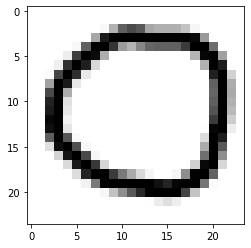

In [41]:
plt.imshow(X_train[0], cmap="gray")

In [42]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [43]:
# 4차원으로 변경
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


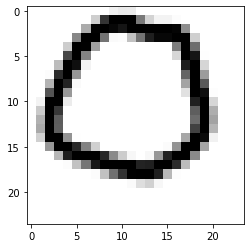

In [44]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [45]:
#모델 구성하기
model = Sequential()

#model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 32, kernel_size = (3,3)))
model.add(Conv2D(input_shape = (24,24,1), filters = 32, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))    #CNN의 특징: pooling 단계를 거침. 크기가 반으로 줄어듦.


model.add(Flatten())

model.add(Dense(128))        #hidden layer 하나 추가
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))        #hidden layer 하나 추가
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(3, activation = 'softmax'))     #마지막 층은 출력층.

#adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
#history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

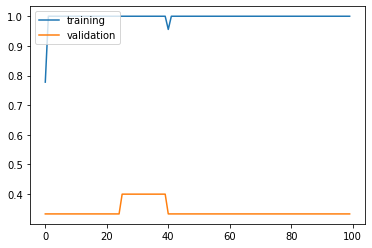

15/15 [==============================] - 0s 628us/step
Test accuracy:  0.3333333432674408


In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

## Model 내부값

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 20, 20, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 20, 20, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)       

batch_normalization:128 파라미터는 복원할 떄 mean, sd 필요하니까 (&보관만 하는 파라미터.. non-trainable params에 포함됨)  


In [31]:
model.layer

AttributeError: 'Sequential' object has no attribute 'layer'

In [49]:
for l in model.layers:
    print(l.name)    #layer name
    print(l.trainable)

conv2d_5
True
batch_normalization_9
True
activation_9
True
conv2d_6
True
batch_normalization_10
True
activation_10
True
max_pooling2d_3
True
flatten_3
True
dense_7
True
batch_normalization_11
True
activation_11
True
dense_8
True
batch_normalization_12
True
activation_12
True
dense_9
True


In [50]:
w = model.layers[0].get_weights()  # (필터, bias)
print(w[0].shape)    #필터. 4차원. 3x3 필터, 32개 필터. 세번째는 항상 0(가짜차원)
print(w[1].shape)    #bias.
#영상처리에서는 bias 없지만. convolution 처리한 뒤 bias 더하는 것 => 출력(1 pixel)
print(w[0][:,:,0,0])  #첫번째 필터
print(w[0][:,:,0,1])  #두번째 필터
print(w[1][0])  #첫번째 필터에 대한 bias

(3, 3, 1, 32)
(32,)
[[ 0.09270769 -0.06853673 -0.07556546]
 [ 0.08702413 -0.05365724 -0.0348813 ]
 [ 0.04265182 -0.02817553  0.08391455]]
[[-0.10735655  0.03177173 -0.07107213]
 [-0.00398383  0.0551823  -0.02443945]
 [ 0.13999479 -0.13367592  0.10912053]]
-1.55894e-05


In [51]:
model.layers[0].output
#kernel size가 3x3이라 영상 size가 24x24에서 22x22로 줄어듦

<tf.Tensor 'conv2d_5/BiasAdd:0' shape=(None, 22, 22, 32) dtype=float32>

In [52]:
model.layers[1].output

<tf.Tensor 'batch_normalization_9/cond/Identity:0' shape=(None, 22, 22, 32) dtype=float32>

In [53]:
model.layers[2].output

<tf.Tensor 'activation_9/Relu:0' shape=(None, 22, 22, 32) dtype=float32>

(15, 22, 22, 32)


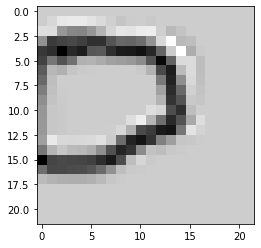

In [64]:
from keras.models import Model

my_layer_model = Model(inputs=model.input,
                      outputs=model.layers[0].output)  #중간 결과를 알고 싶으면 모델 흐름을 만들어야 해
output = my_layer_model.predict(X_test)    #4차원 데이터를 흘려보내

print(output.shape)

plt.imshow(output[0,:,:,5], cmap="gray")    #0번째이미지, 6번째필터 적용된 영상
plt.show()

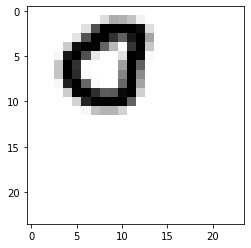

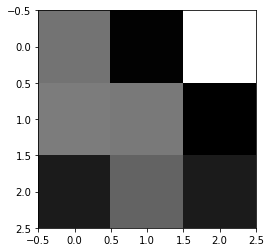

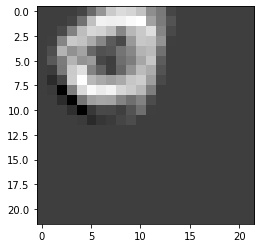

In [73]:
iFilter = 4
iImg = 1

#2번째 이미지
plt.imshow(X_test[iImg,:,:,0], cmap="gray")
plt.show()

#5번째 필터
w = model.layers[0].get_weights()  # (필터, bias)
plt.imshow(w[0][:,:,0,iFilter], cmap="gray")
plt.show()

#출력 = 이미지 * (필터+b)
plt.imshow(output[iImg,:,:,iFilter], cmap="gray")
plt.show()

In [76]:
#첫번째 이미지에 대해서 flatten 된 output 얻어봐
# = 특징추출기
from keras.models import Model

my_layer_model = Model(inputs=model.input,
                      outputs=model.get_layer("flatten_3").output)  #중간 결과를 알고 싶으면 모델 흐름을 만들어야 해
output = my_layer_model.predict(X_test)    #4차원 데이터를 흘려보내. not 에측ftn. just forward ftn.

print(output.shape)
print(output)

(15, 6400)
[[-0.          1.247636    0.36792737 ... -0.         -0.
  -0.        ]
 [-0.          0.32837728  0.37524524 ... -0.         -0.
  -0.        ]
 [-0.          0.35040003  0.4010006  ... -0.         -0.
  -0.        ]
 ...
 [-0.          0.35040003  0.4010006  ... -0.         -0.
  -0.        ]
 [-0.          0.35040003  0.4010006  ... -0.         -0.
  -0.        ]
 [-0.          0.35040003  0.4010006  ...  0.5713123   0.43800807
   1.1691586 ]]


In [90]:
#첫번째 이미지에 대해서 flatten 된 output 얻어봐
# = 특징추출기
from keras.models import Model

my_layer_model = Model(inputs=model.input,
                      outputs=model.get_layer("dense_9").output)  #중간 결과를 알고 싶으면 모델 흐름을 만들어야 해
output = my_layer_model.predict(X_test)    #4차원 데이터를 흘려보내. not 에측ftn. just forward ftn.

print(output.shape)
# (15,3) : 15 samples, 3 categories.
print('output: ', output) #각각의 확률이 나와
#첫번째 샘플은 세 번째 카테고리일 확률이 제일 높다.



p=np.argmax(output, axis=1) #예측값
T=np.argmax(y_test, axis=1) #true value

print('argmax value: ',  p  )
print('y_test', T)
#확률 한번에 프린트
print(  sum(p == T)*1  )
print(  sum(p == T)*1 / len(p)  )

(15, 3)
output:  [[1.95473600e-02 4.70304489e-02 9.33422148e-01]
 [1.96590707e-01 6.90834299e-02 7.34325826e-01]
 [9.81319044e-03 1.73401181e-02 9.72846687e-01]
 [1.95024803e-03 1.45783485e-03 9.96591926e-01]
 [1.22597697e-03 7.97036744e-04 9.97976959e-01]
 [5.04953265e-01 9.65528637e-02 3.98493886e-01]
 [2.00959649e-02 1.26696214e-01 8.53207886e-01]
 [4.16438393e-02 8.40282068e-03 9.49953258e-01]
 [4.10870574e-02 1.76306173e-01 7.82606840e-01]
 [7.07483990e-03 4.06818045e-03 9.88856971e-01]
 [2.50175111e-02 2.10821275e-02 9.53900456e-01]
 [4.12460696e-03 4.88908263e-03 9.90986347e-01]
 [1.16719678e-02 1.03123635e-02 9.78015721e-01]
 [1.05144959e-02 5.07323816e-03 9.84412253e-01]
 [6.17752690e-03 3.61365755e-03 9.90208864e-01]]
argmax value:  [2 2 2 2 2 0 2 2 2 2 2 2 2 2 2]
y_test [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
5
0.3333333333333333
